In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Read Data**

In [3]:
url = 'https://raw.githubusercontent.com/cs575ts/Assignments/main/Assignment_2/D3.csv'

dataframe = pd.read_csv(url)

In [4]:
dataframe.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


**Single Exponential Smoothing without inbuilt function**

In [5]:
s1 = dataframe["Passengers"][0]
alpha_array = [0.3,0.6,0.9]

**Seasonality index**

In [6]:
season_len = 12
n_seasons = int(len(dataframe['Passengers'])/season_len)

season_sum = []
for j in range(n_seasons):
  season_sum.append(np.sum(dataframe['Passengers'][season_len*j:season_len*j+season_len]))
  
print(season_sum)

[1520, 1676, 2042, 2364, 2700, 2867, 3408, 3939, 4421, 4572, 5140, 5714]


In [7]:
seasonal_idx = []
for n_s in range(n_seasons):
  s_idx = []
  for sl in range(season_len):
    sea_idx = dataframe['Passengers'][season_len*n_s+sl]/season_sum[n_s]
    s_idx.append(sea_idx.round(5))
  if(n_s==0):
    print('Seasonality index for each month')
  print(s_idx)
  seasonal_idx.extend(s_idx)

Seasonality index for each month
[0.07368, 0.07763, 0.08684, 0.08487, 0.07961, 0.08882, 0.09737, 0.09737, 0.08947, 0.07829, 0.06842, 0.07763]
[0.06862, 0.07518, 0.08413, 0.08055, 0.07458, 0.0889, 0.10143, 0.10143, 0.09427, 0.07936, 0.06802, 0.08353]
[0.07101, 0.07346, 0.08717, 0.07982, 0.08423, 0.08717, 0.09745, 0.09745, 0.09011, 0.07933, 0.0715, 0.08129]
[0.07234, 0.07614, 0.08164, 0.07657, 0.07741, 0.09222, 0.09729, 0.10237, 0.08841, 0.0808, 0.07276, 0.08206]
[0.07259, 0.07259, 0.08741, 0.08704, 0.08481, 0.09, 0.09778, 0.10074, 0.08778, 0.07815, 0.06667, 0.07444]
[0.07115, 0.06557, 0.08197, 0.07918, 0.08162, 0.09208, 0.10534, 0.1022, 0.09034, 0.07987, 0.07081, 0.07987]
[0.07101, 0.06837, 0.07835, 0.07893, 0.07923, 0.09243, 0.10681, 0.10182, 0.09155, 0.0804, 0.06954, 0.08157]
[0.0721, 0.07032, 0.08048, 0.07946, 0.08073, 0.09495, 0.10485, 0.10282, 0.09012, 0.07768, 0.0688, 0.07768]
[0.07125, 0.06808, 0.08052, 0.07872, 0.0803, 0.09545, 0.10518, 0.10563, 0.09138, 0.07849, 0.06899, 0.076]

In [8]:
final_seasonal_idx = []
for sl in range(season_len):
  idx_sum = 0 
  for n_s in range(n_seasons):
    idx_sum += (seasonal_idx[season_len*n_s+sl])
  Sea_idx_avg = idx_sum/n_seasons  
  final_seasonal_idx.append(Sea_idx_avg.round(5))

print('average seasonality index (12 season average): ')
print(final_seasonal_idx)

average seasonality index (12 season average): 
[0.07176, 0.07099, 0.08167, 0.07992, 0.08052, 0.09188, 0.10303, 0.10309, 0.09006, 0.07923, 0.06933, 0.07851]


**Function for single exponential smoothing**

In [9]:
def dataset_with_interval(dataset):
  forecasted_list=[]
  mse_list = []
  complete_fc_val_list=[]
  for alpha in alpha_array:
    s = [s1]
    for i in range(len(dataset)):
      si = alpha*(dataset[i]) + ((1-alpha)*s[i])
      s.append(si)
    s.remove(s[0])
    
    fc_s = s.copy()
    forecasted_list.append(s[-1])
    complete_fc_val_list.append(fc_s)
    s.remove(s[-1])
    s.insert(0,0)
    cp_df = dataset.copy()
    cp_df = np.c_[ cp_df, s ] 
    error_array = cp_df[:,0] - cp_df[:,1]
    cp_df = np.c_[ cp_df, error_array ]
    sqer_arr = (cp_df[:,2])**2
    cp_df = np.c_[cp_df,sqer_arr]

    MSE = np.sum(cp_df[1:len(dataset),3])/(len(cp_df)-1) 
    mse_list.append(MSE)

  return mse_list,forecasted_list,complete_fc_val_list

**Different interval data array**

In [10]:
data= dataframe.values
dataset_array = [data[0::1][:,1],data[0::2][:,1],data[0::4][:,1],data[0::8][:,1],data[0::12][:,1],data[0::24][:,1]]


**Different interval time array**

In [11]:
time_array = []
for d in dataset_array:
  t = range(d.shape[0])
  time_array.append(t)

**Function call for MSE and prediction calculations**

In [12]:
final_mse_list = []
final_forecasted_list = []
final_fc_val_list = []
for df in dataset_array:
  mse_list,forecasted_list,complete_fc_val_list = dataset_with_interval(df)
  final_mse_list.append(mse_list)
  final_fc_val_list.append(complete_fc_val_list)
  final_forecasted_list.append(forecasted_list)

In [13]:
final_mse_list

[[2104.9017123144286, 1576.108858243152, 1215.0375140697417],
 [2908.3808902903334, 3095.9361801987193, 3263.3092590950014],
 [1703.8872313955303, 1033.5276543051184, 1077.7547025972415],
 [4439.745669565798, 2085.7253138670917, 1749.2495981841473],
 [5587.092406803072, 2068.166216664335, 1129.0040161212728],
 [11387.072310138003, 5605.000255488002, 3115.6427266980004]]

In [14]:
final_forecasted_list 

[[461.7665886331188, 431.7607276931497, 428.5668665454442],
 [464.4050213971722, 444.42155650889515, 402.7846358201001],
 [451.9725198327169, 486.1370767846164, 503.89113972873594],
 [405.37055909315734, 452.2029831998695, 470.07621169187667],
 [335.69632401870996, 387.98109349888, 411.07144092097],
 [259.16058999999996, 325.73248, 354.71857]]

In [15]:
min_idx=[]
for minval in final_mse_list: 
  minidx = minval.index(min(minval))
  min_idx.append(minidx)

In [16]:
min_idx

[2, 0, 1, 2, 2, 2]

In [17]:
interval_arr = [1,2,4,8,12,24]

**Plotting function for predicted values ad actual values**

In [18]:
def plotting_function(fc_val,data_val,time_val,interval_val,alpha_val):
  fig = plt.gcf()
  plt.plot(time_val,data_val,color='g',label='Original')
  plt.plot(time_val,fc_val,color='r',label='Forcasted')
  fig.set_size_inches(12,8)
  plt.legend()
  plt.xlabel('Time (in months)')
  plt.ylabel('Passengers')
  plt.title('Prediction at '+str(interval_val)+' month interval at the least MSE (alpha='+str(alpha_val)+ ')')
  plt.figure()
  plt.close

**Plotting of predicted values and actual values for different intervals**

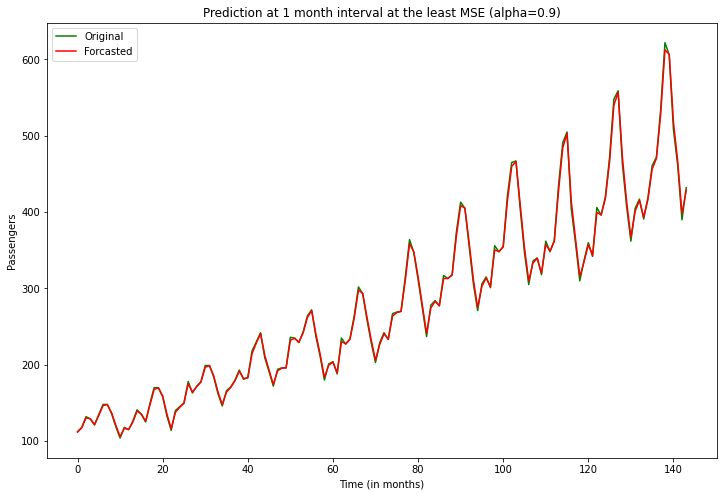

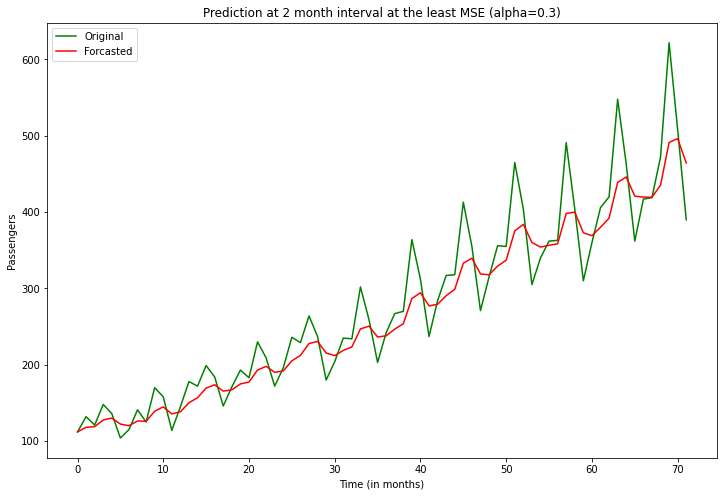

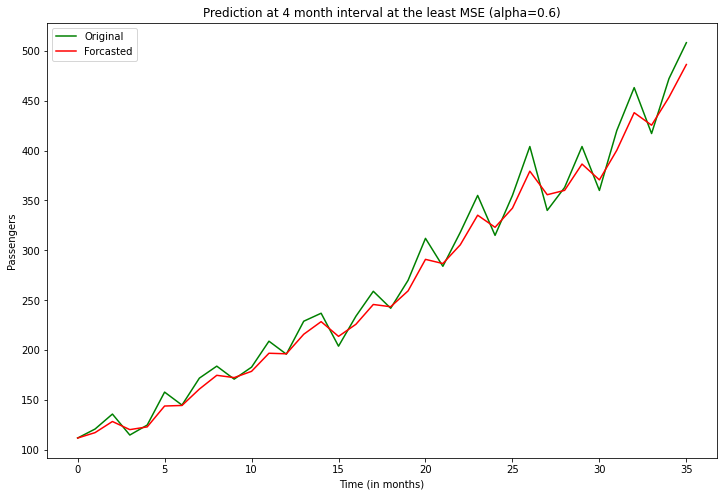

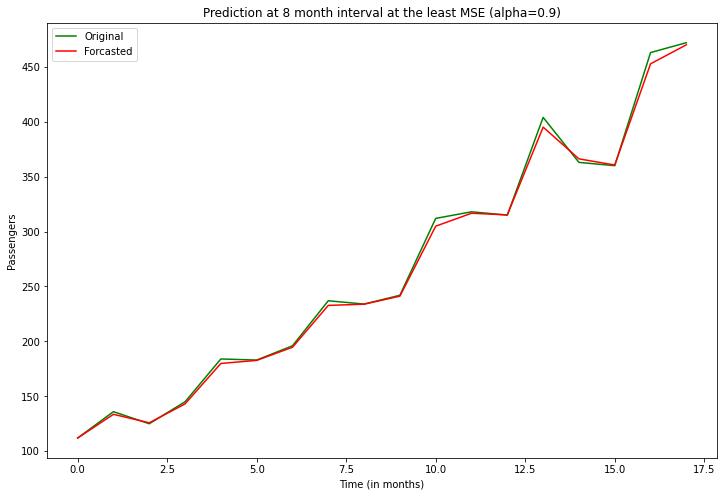

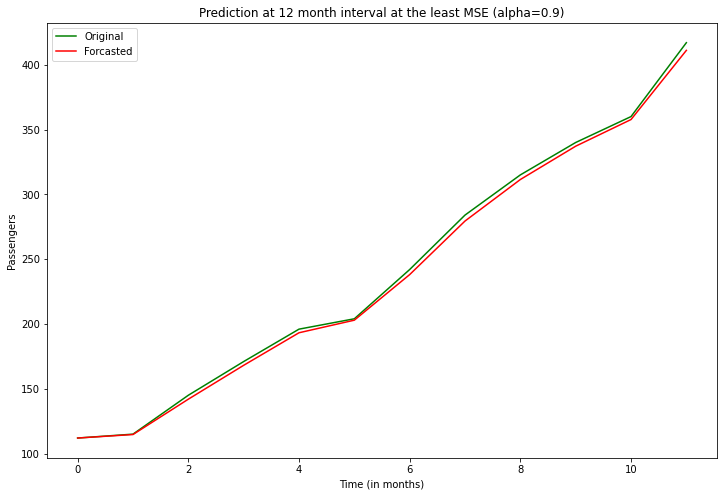

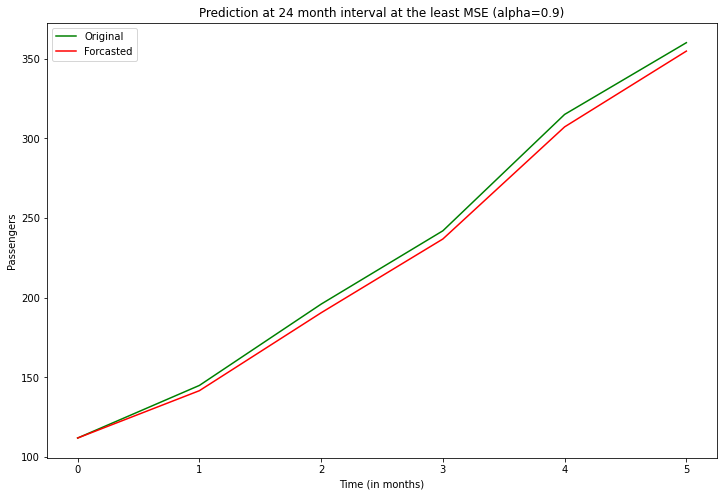

<Figure size 432x288 with 0 Axes>

In [19]:
for fc_idx in range(6):
  plotting_function(final_fc_val_list[fc_idx][min_idx[fc_idx]],dataset_array[fc_idx],time_array[fc_idx],interval_arr[fc_idx],alpha_array[min_idx[fc_idx]])  

**Table of Least MSE value for each interval**

In [20]:
from tabulate import tabulate

tab_array = []
for n in range(6):
  tab = [(interval_arr[n]),final_mse_list[n][min_idx[n]]]
  tab_array.append(tab)

table = tabulate(tab_array, headers=['interval(in months)', 'Least MSE'], tablefmt='orgtbl')

print(table)

|   interval(in months) |   Least MSE |
|-----------------------+-------------|
|                     1 |     1215.04 |
|                     2 |     2908.38 |
|                     4 |     1033.53 |
|                     8 |     1749.25 |
|                    12 |     1129    |
|                    24 |     3115.64 |


**Plotting of MSE at different intervals**

In [21]:
def mse_plotting_func(inter_val,mseval):
  fig = plt.gcf()
  ax = fig.add_axes([0,0,1,1])
  rects = ax.bar(inter_val,round(mseval,2),color='b')
  for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
  fig.set_size_inches(12,8)
  plt.xlabel('Interval(in months)')
  plt.ylabel('MSE')
  plt.title('MSE VS Interval')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


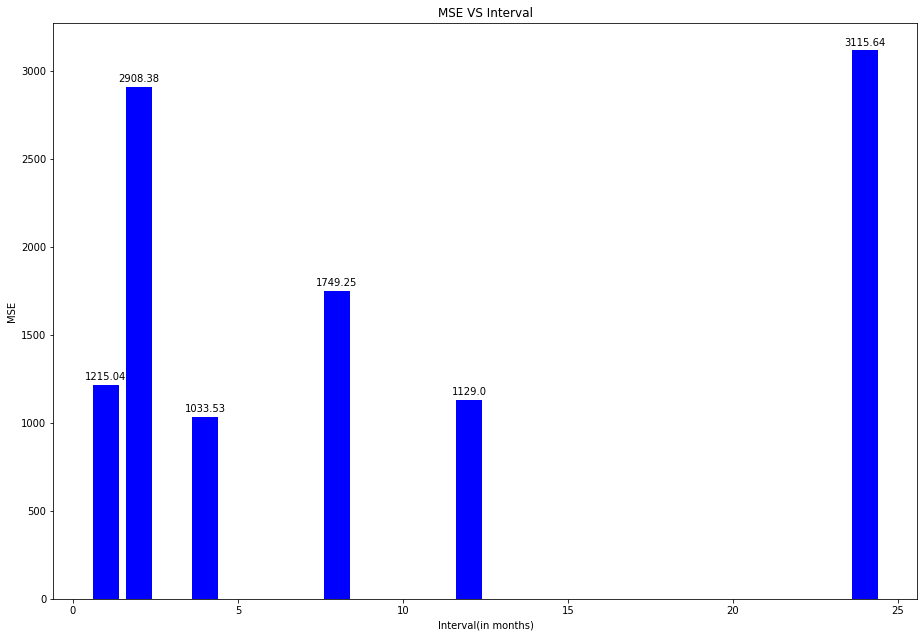

In [22]:
for idx in range(6):
  mse_plotting_func(interval_arr[idx],final_mse_list[idx][min_idx[idx]])

**Comparing forecasted values with inbuilt function (on original data)**

In [23]:
from sklearn.metrics import mean_squared_error

model = SimpleExpSmoothing(dataframe['Passengers'])
dataframe['pred_val'] = model.fit(smoothing_level=0.9,optimized=False).fittedvalues.shift(0)

MSE = mean_squared_error(dataframe.pred_val.dropna(),dataframe.Passengers)

In [24]:
print('MSE (inbuilt function): ',MSE)
print('MSE (own function): ',final_mse_list[0][min_idx[0]])

MSE (inbuilt function):  1206.599753555369
MSE (own function):  1215.0375140697417


In [25]:
print('Difference in error: ',final_mse_list[0][min_idx[0]]-MSE)

Difference in error:  8.437760514372712
